## 🔵 Can we predict credit card fraud




###### By Megin van Herk

In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
print('numpy version:', np.__version__)
print('pandas version:', pd.__version__)
print('scikit-learn version:', sk.__version__)
print('matplotlib version:', matplotlib.__version__)
#sampling 
from imblearn.under_sampling import RandomUnderSampler  
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
#setting plot style
plt.style.use('seaborn-darkgrid')
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

numpy version: 1.20.3
pandas version: 1.3.4
scikit-learn version: 0.24.2
matplotlib version: 3.4.3


## 🔵 Index


🔷Domain understanding

🔹Data sourcing

🔹Analytic approach



🔷 Provisioning

🔹Data requirements

🔹Data collection

🔹Data understanding

🔹Data preperation



🔷 Predictions

🔹Preprocessing

🔹Modelling

🔹Evaluation

-------------------

# 🔷Domain understanding

The main part for domain understanding can be found in the project proposal document.



### 🔹Data sourcing

For inital EDA I did some exploring of some possible datasets I found:

#### Credit card fraud dataset

This dataset contains only numeric data. It has very little cases of actual credit card fraud, it is very imbalanced. Most of the data is anonymous. It has the column “class” which 0 means no fraud and 1 means fraud. 
https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud


In [2]:
df = pd.read_csv("Data/creditcard.csv") #read the csv file
df.head(5) #display top 5 rows

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

There is very little amount of data for actual frauds. we will have to perform some sort of scaling to improve this.

#### Fraud detection dataset

This dataset contains more Categorical data Including peoples names ages and genders etc.This data consists of 2 different csv files that are “test” and “train”. This data is from customers in the US containing around 2 million rows.
https://www.kaggle.com/datasets/kartik2112/fraud-detection


In [4]:
#combining trian and test datasets
fraud = pd.concat([pd.read_csv('Data/fraudTrain.csv'),
                pd.read_csv('Data/fraudTest.csv')],
               ignore_index=True) #read the csv file
fraud.drop('Unnamed: 0',axis=1,inplace=True) #unnecessary column, it copied the index into another column
fraud.head(5) # display the top 5 rows

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [5]:
fraud.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

This data set has allot more catergorical data, including a time stamp, which could be used for time series algorithm. It also gives us longtitude and latidude, so we can plot some geographic data. This is probably so that we can compare the transactions lontitude latiude with the merch long and latidude, to see if the difference ein geolocation leads to fraud.

- merch_lat -> lattitude of the merchant
- merch_long -> longitude of merchant
- lat -> transaction lattitude
- long -> transaction longitude

It also gives us DOB, so we can compare if the age of card holders has any correlation with fraud or not.

- dob -> date of birth of card holder

In [6]:
fraud.is_fraud.value_counts()

0    1842743
1       9651
Name: is_fraud, dtype: int64

This data also has very little amount of data for actual frauds. This can affect the prediction outcome. we will have to perform some sort of scaling to improve this.

### I will use both datasets and see which one will get the better result in the end


I think comparing numerical data and catergorical datasets can be interesting to see which one yields a better result.

### 🔹Analytic approach

In an analytic approach we decide the target variable, we find the nature of the problem and we find good indicators. This will also be in the jupyter notebook with plots.

Our target variable will be “is it credit card fraud or not?” 
This shows in dataset 1 as “class”= “1”or ”0”. In dataset 2 it is shown as “is_fraud”=”1”or ”0”.
1 meaning, yes there is credit card fraud.
0 meaning, no there is no credit card fraud.
Having a binary target variable will make certain predictions easier. and more accurate.


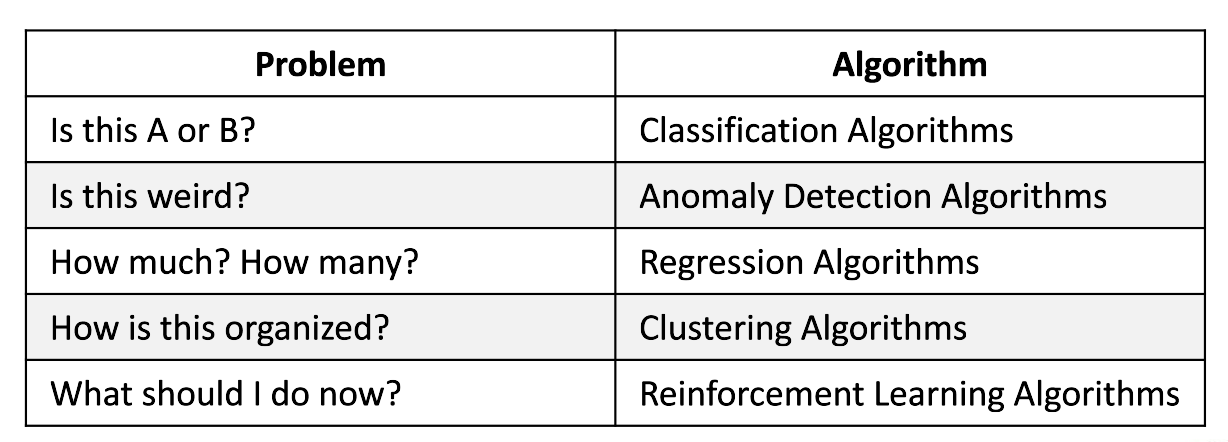

 Our problem is definitely “is this A or B” so a classification algorithm could be applied here. since our main research problem is “Is this credit card fraud or not?”
Other possible algorithms that could be used is the regression algorithm, we could rephrase the question and ask “how many credit card frauds were there/are there going to be?”. This would also then fit the regression algorithm.


specific algorithms I will try:

- Logistic regression
- Decision tree
- Random forest


# 🔷 Provisioning

## 🔹Data requirements


The high level functions and capabilities of the domain start ofcourse at credit card fraud victims, to banks of the credit card fraud, untill entire countries economies can get affected.

###### ◽️ Stakeholders

People who could benefit of this research are:
- <b>Individual credit card holders</b>

  People who own a credit card and are afraid there being scammed could benefit of this research. They could determine whether   or not they are experiencing credit card or not via this research.
  
  
- <b>Banks</b>

  Banks have many customers who can suffer from credit card fraud, they could use this research to secure their clients and p p   possibly prevent credit card fraud. 

###### ◽️ Required data elements

For the required data elements, ofcourse the data has to be readable. You have to be able to understand the data. Everything has to be logically organized. 

#### Data Dictionary
- trans_date_trans_time = Transaction time stamp
- cc_num = Credit card number
- merchant = merchant name
- category = transaction category
- amt = Transaction amount
- first = First name of card holder
- last = Last name of card holder
- gender = Sex of card holder
- street = transaction address
- city = transaction city
- state = transaction state
- zip = transaction zipcode
- lat = transaction lattitude
- long = transaction longitude
- city_pop = Population of the city
- job = job of the card holder
- dob = date of birth of card holder
- trans_num = transaction number of transaction
- unix_time = time in unix format
- merch_lat = lattitude of the merchant
- merch_long = longitude of merchant
- is_fraud = nature of transaction (fraud or not fraud)

#### Facts & Dimensions

We have allot of columns in our dataset its is good to know what is a facts and what is a dimension. It is a good to way to get to know your data and organize it.

Facts are usually something you are able to calculate.

◼️ Facts:

    ▪️ amt: Best example of a "fact" is the amount of money, in this case the amount of money they got scammed
    ▪️ unix_time: the unix time format is a more easier way to calculate time passed.
    
Most dimensions require to be organized, the best example of this is a date.
    
◻️ Dimensions:

    ▫️ trans_date_trans_time: The time/date is very important, you gather hierachy and grain and all kinds of important info
    ▫️ Longtitude and latitude : location is an important dimension, it accompanies a fact. Same for; Zip,City,State.
    ▫️ Job: knowing a person job is an interesting dimension and category to know. Same for:Name, gender and dob
    ▫️ category: is the transaction category, it is good to know in relation to the fact: amount.
    ▫️ is_fraud: Our target variable, the most important category
    

## 🔹Data collection

In this section we will focus on how we are going to collect the data

We currently have 2 datasets. 1 with mainly numercial data and the 2 with mainly categorical data. To keep things clear we name them so:


In [7]:
num = df #df is previous name of the dataset 1
num

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [8]:
cat = fraud #fraud is previous name of dataset 2
cat

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
1852390,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
1852391,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
1852392,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


## 🔹Data understanding

To be able to understand our data better, its better to view it a more familar envoirement instead if just tabular form.

### ◼️ Data analyses

Here we explaining what is presented in the dataset 

#### Dataset 1

In [9]:
#determing the shape of the dataset
num.shape

(284807, 31)

This number shows the amount of rows (284807) and the amount of column (31)

In [10]:
num.head(5) #showing the dataframe

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In this dataset all the columns from v1-v28 are censored details of individual cases. The only columns remaining are "Amount" being the amount that was stolen, and "Class" which specifies if there was fraud(1) or not(0). and also the column "time"

In [11]:
num[['Amount','Class','Time']].describe()

,Amount,Class,Time
count,284807.000000,284807.000000,284807.000000
mean,88.349619,0.001727,94813.859575
std,250.120109,0.041527,47488.145955
min,0.000000,0.000000,0.000000
25%,5.600000,0.000000,54201.500000
50%,22.000000,0.000000,84692.000000
75%,77.165000,0.000000,139320.500000
max,25691.160000,1.000000,172792.000000


If we describe the 3 most important columns we can see that the the minimum amount is 0 dollar, and the most amount is 25691 dollars, with a mean of 88 dollars. We have a total of 284807 data entries, how many of those are fraud?

The column "time" goes from 0 untill 25691. Time contains the seconds elapsed between each transaction and the first transaction in the dataset

In [12]:
#let us check the percentage of fraudulent data points in our dataset
100*num.Class.value_counts(normalize=True)

0    99.827251
1     0.172749
Name: Class, dtype: float64

in dataset 1 only 0.17% of the data is fraudulent.

In [13]:
# Good No Null Values!
num.isnull().sum().max()

0

#### Dataset 2

In [14]:
#determing the shape of the dataset
cat.shape

(1852394, 22)

This number shows the amount of rows (1852394) and the amount of column (22)

In [15]:
cat.head(5) #showing the dataframe

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


This dataset contains allot of categorical, we can use allot of these columns to create easy to read visualazations. 

I will convert the column containing the date to datetime so we can extract more information out of this, such as the specific day and month, for later visualazation

In [16]:
#converting trans_date_trans_time into datetime
cat['trans_date_trans_time'] = pd.to_datetime(cat['trans_date_trans_time'])

In [17]:
# making additonal columns from 'trans_date_trans_time'
# hour
cat['hour'] = cat['trans_date_trans_time'].dt.hour
#'day of the week'
cat['day'] = cat['trans_date_trans_time'].dt.day_name()
#'year_month'
cat['month_year'] = cat['trans_date_trans_time'].dt.to_period('M')
#only month name
cat['month'] = pd.to_datetime(cat['trans_date_trans_time']).dt.month_name()


In [18]:
# Defining the order of the days of the week
day = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", 
          "Sunday"]

In [19]:
 # we sort the column weekdaystart to the variable day
cat['day'] = pd.Categorical(cat['day'], categories=day, ordered=True)

In [20]:
cat

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,hour,day,month_year,month
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,Tuesday,2019-01,January
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,Tuesday,2019-01,January
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,Tuesday,2019-01,January
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,Tuesday,2019-01,January
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,Tuesday,2019-01,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,...,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0,23,Thursday,2020-12,December
1852390,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,...,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0,23,Thursday,2020-12,December
1852391,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,...,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0,23,Thursday,2020-12,December
1852392,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,...,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0,23,Thursday,2020-12,December


We now made 3 new columns, "hour","day","month_year". we will use these later to make interesting graphs, giving us more insight into the domain

Also for this dataset we will check how much is fraud

In [21]:
#let us check the percentage of fraudulent data points in our dataset
100*cat.is_fraud.value_counts(normalize=True)

0    99.478999
1     0.521001
Name: is_fraud, dtype: float64

Also in this dataset 2, there is only a 0.52% of fraud in total, to make our prediction more accurate we will do some sort of scaling later in preproccesing

In [22]:
# Good No Null Values!
cat.isnull().sum().max()

0

### ◼️ Data visualization

####  dataset 1

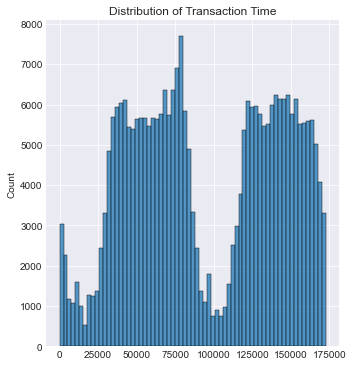

In [23]:
# Time
sns.displot(num['Time'].values)
plt.title('Distribution of Transaction Time');

Here we see the overall distribution of the time. There is a dip at 10000

Lets review the distribution of fraud and not fraud compared

<AxesSubplot:ylabel='Density'>

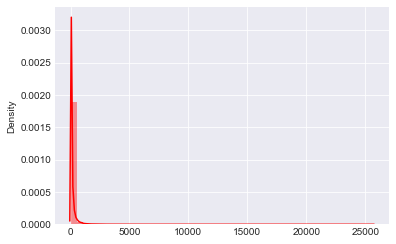

In [25]:
sns.distplot(num['Amount'].values , color = 'r')

In this ditribution graph we can see that there are allot of outliers.

#### dataset 2

Exploring the time data:

<AxesSubplot:xlabel='day', ylabel='count'>

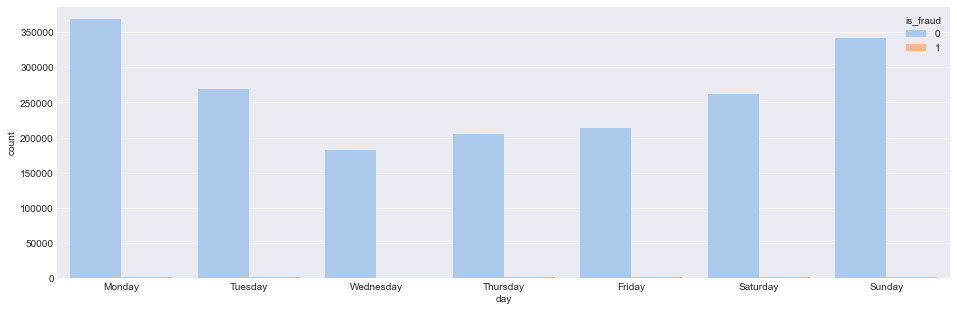

In [26]:
plt.figure(figsize=(16,5))
sns.countplot(x="day", data=cat, hue="is_fraud",
            palette="pastel")

This graph shows the distribution of data entries for each day of the week, monday has the most amount.

<AxesSubplot:xlabel='hour', ylabel='count'>

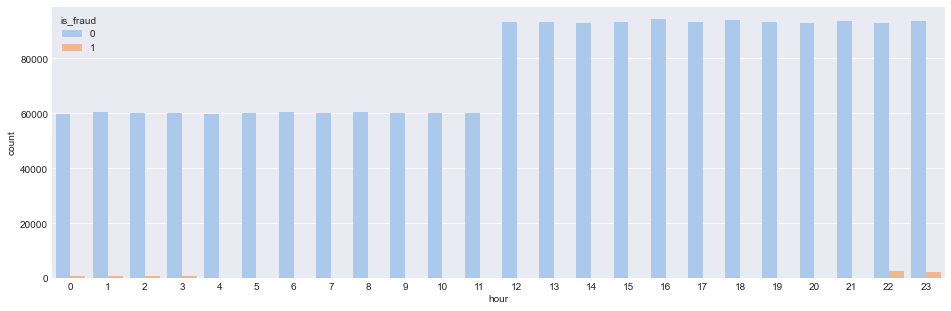

In [27]:
plt.figure(figsize=(16,5))
sns.countplot(x="hour", data=cat,hue="is_fraud",
            palette="pastel")

<AxesSubplot:xlabel='month', ylabel='count'>

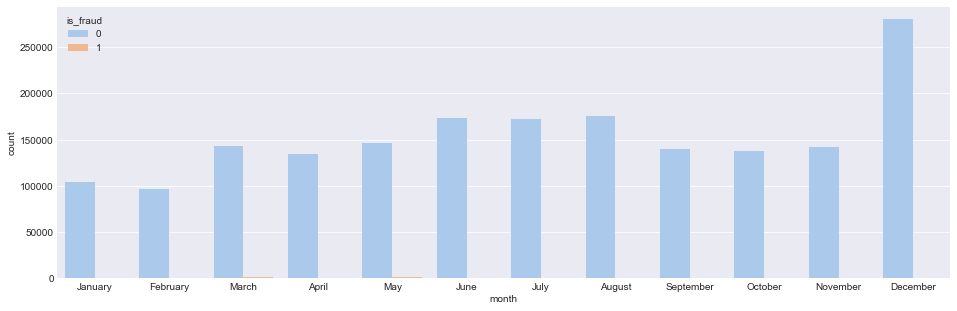

In [28]:
plt.figure(figsize=(16,5))
sns.countplot(x="month", data=cat,hue="is_fraud",
            palette="pastel")

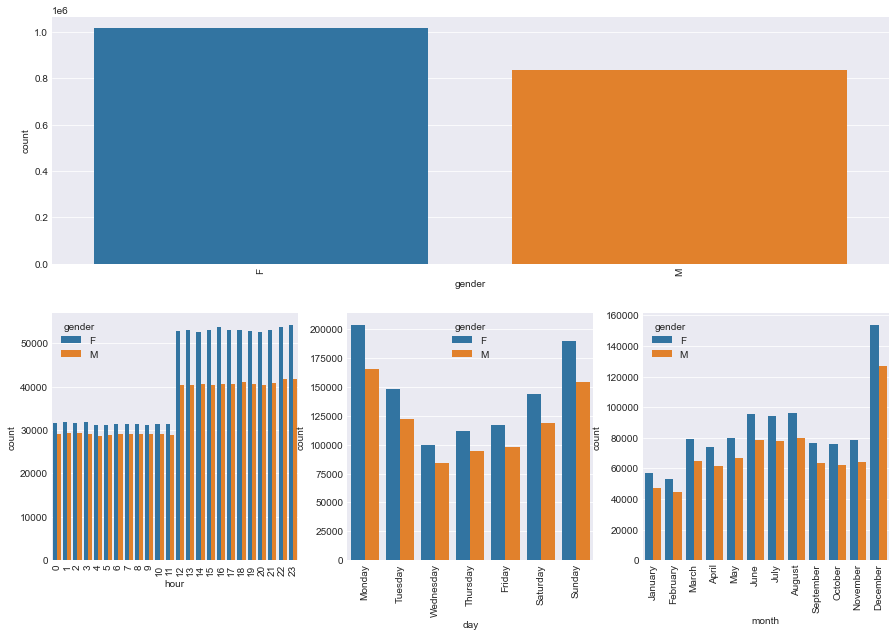

In [29]:
fig, ax = plt.subplots(figsize=(15,10))

plot = [0,0,0,0]
#plot gender
plot[0] = sns.countplot(cat.gender, ax=plt.subplot(211))
#plot gender in comparison with time
plot[1] = sns.countplot(cat.hour, hue=cat.gender, ax=plt.subplot(234))
plot[2] = sns.countplot(cat.day, hue=cat.gender, ax=plt.subplot(235))
plot[3] = sns.countplot(cat.month, hue=cat.gender, ax=plt.subplot(236))

for i in plot:
  i.set_xticklabels(i.get_xticklabels(), rotation=90) #rotate the x labels 90 degrees
plt.show()

Here we can see that females have more transactions, therefor they have a higher chance of fraud.
Also interesting to see is in graph 4 for the distribution for each month, that december has the highest count, this is probably due to the holiday season, which gives opputunity for more fraud, since most peope do more transaction for gifts.

Geolocation:

<Figure size 1152x360 with 0 Axes>

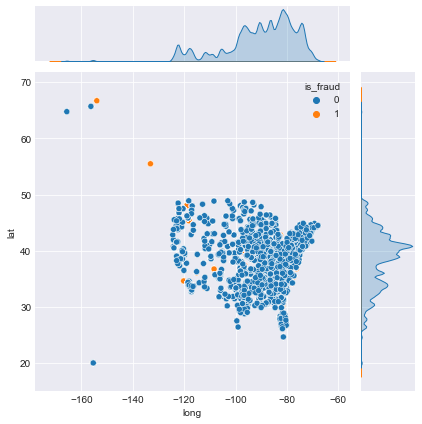

In [41]:
plt.figure(figsize=(16,5))
sns.jointplot(data=cat, x="long", y="lat", hue="is_fraud")

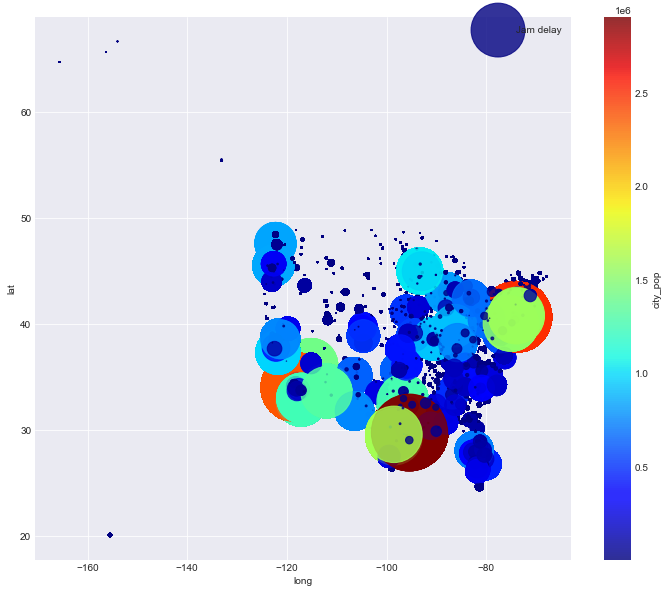

In [36]:
cat.plot(kind="scatter",x='long',y='lat',alpha=0.8,
    s=cat["city_pop"]/500,label="Jam delay",figsize=(12,10),
    c="city_pop",cmap=plt.get_cmap("jet"),colorbar=True,
    sharex=False)
plt.legend()

## 🔹Data preperation


In this section we will prepare data. We will clean it where neccesary

#### dataset 1

In [ ]:
from sklearn.preprocessing import RobustScaler

# RobustScaler is less prone to outliers.
RobScaler = RobustScaler()

scaled_amount = RobScaler.fit_transform(num['Amount'].values.reshape(-1,1))
scaled_time = RobScaler.fit_transform(num['Time'].values.reshape(-1,1))

In [ ]:
# replace the unscaled columns with its scaled values
num.drop(['Time','Amount'], axis=1, inplace=True)
num.insert(0 , 'scaled_amount' , scaled_amount)
num.insert(1 , 'scaled_time' , scaled_time)

num.head()

In [ ]:
# under Sampling
X = num.drop('Class' , axis = 1)
y = num['Class']
RUS = RandomUnderSampler(random_state=42) # Supports multi-class resampling by sampling each class independently
X_rus, y_rus = RUS.fit_resample(X,y) 

In [ ]:
# show Class count again for the under sampling data
ax = sns.countplot(y_rus)
plt.title('Credit Card Fraud Class - data balance (Not fraud = 0, Fraud = 1)');
ax.bar_label(ax.containers[0])
ax.set_xticklabels(['Not fraud = 0', 'Fraud = 1']);

In [ ]:
df_rus = pd.concat([X_rus ,y_rus]  , axis = 1)

f, ax = plt.subplots(2, 1, figsize=(20,18))

# Imbalanced Correlation Matrix for original data
sns.heatmap(df.corr() , cmap = 'coolwarm_r' , ax= ax[0] )
ax[0].set_title('Imbalanced Correlation Matrix' , fontsize=14)

# balanced Correlation Matrix for under sampling data
sns.heatmap(df_rus.corr() , cmap = 'coolwarm_r' , ax= ax[1])
ax[1].set_title('balanced Correlation Matrix' , fontsize=14)

# 🔷 Predictions

## 🔹Preprocessing

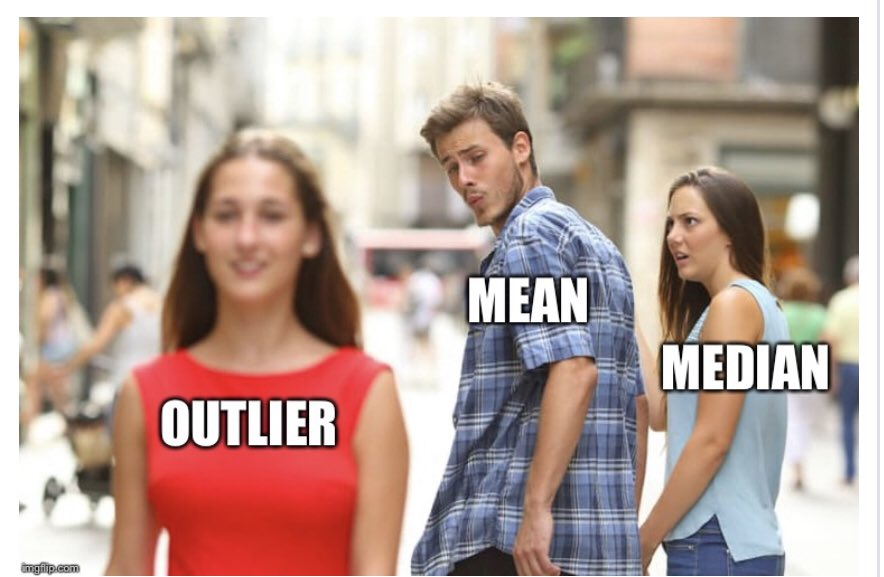

## 🔹Modelling

## 🔹Evaluation